Challenge 1

Open up a new IPython notebook
Download a few MTA turnstile data files
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [80]:
# Import packages

import csv
import datetime
from datetime import datetime
import matplotlib as plt
import pandas as pd
import dateutil.parser
import matplotlib.pyplot as plt

In [5]:
# Create a dictionary using the first four columns as key

if __name__=="__main__":
        mydict = {}
        reader = csv.reader(open("/Users/xiangli/ds/metis/Week 1/turnstile_170107_sub.csv", "rt"))
        for i, rows in enumerate(reader):
            if i == 0: continue
            k = tuple(rows[0:4])
            v = rows[5:]
            if not k in mydict:
                mydict[k] = [v]
            else:
                mydict[k].append(v)

In [6]:
# Display the dictionary
mydict

{('A002',
  'R051',
  '02-00-00',
  '59 ST'): [['BMT',
   '12/31/16',
   '3:00:00',
   'REGULAR',
   '5991546',
   '2028378'], ['BMT', '12/31/16', '7:00:00', 'REGULAR', '5991565', '2028389'], ['BMT',
   '12/31/16',
   '11:00:00',
   'REGULAR',
   '5991644',
   '2028441'], ['BMT',
   '12/31/16',
   '15:00:00',
   'REGULAR',
   '5991971',
   '2028502'], ['BMT',
   '12/31/16',
   '19:00:00',
   'REGULAR',
   '5992418',
   '2028543'], ['BMT',
   '12/31/16',
   '23:00:00',
   'REGULAR',
   '5992638',
   '2028572'], ['BMT',
   '1/1/17',
   '3:00:00',
   'REGULAR',
   '5992718',
   '2028585'], ['BMT', '1/1/17', '7:00:00', 'REGULAR', '5992730', '2028594'], ['BMT',
   '1/1/17',
   '11:00:00',
   'REGULAR',
   '5992776',
   '2028636'], ['BMT',
   '1/1/17',
   '15:00:00',
   'REGULAR',
   '5992980',
   '2028680'], ['BMT',
   '1/1/17',
   '19:00:00',
   'REGULAR',
   '5993301',
   '2028728'], ['BMT',
   '1/1/17',
   '23:00:00',
   'REGULAR',
   '5993515',
   '2028750'], ['BMT',
   '1/2/17',
   '3:

Challenge 2

Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [7]:
# Create a dictionary with date, time and entries

from collections import defaultdict

if __name__=="__main__":
        dict2 = {}
        reader = csv.reader(open("/Users/xiangli/ds/metis/Week 1/turnstile_170107_sub.csv", "rt"))
        for i, rows in enumerate(reader):
            if i == 0: continue
            k = tuple(rows[0:4])
            v1 = datetime.strptime(rows[6], '%m/%d/%y').strftime('%Y-%m-%d') 
            v2 = rows[7]
            v = v1 + ' ' + v2
            if not k in dict2:
                dict2[k] = [[dateutil.parser.parse(v), rows[-2].lstrip('0')]]
            else:
                content = [dateutil.parser.parse(v)]
                content.append(rows[-2].lstrip('0'))
                dict2[k].append(content)

In [8]:
# Display the dictionary
dict2

{('A002',
  'R051',
  '02-00-00',
  '59 ST'): [[datetime.datetime(2016, 12, 31, 3, 0),
   '5991546'], [datetime.datetime(2016, 12, 31, 7, 0), '5991565'], [datetime.datetime(2016, 12, 31, 11, 0),
   '5991644'], [datetime.datetime(2016, 12, 31, 15, 0),
   '5991971'], [datetime.datetime(2016, 12, 31, 19, 0), '5992418'], [datetime.datetime(2016, 12, 31, 23, 0),
   '5992638'], [datetime.datetime(2017, 1, 1, 3, 0),
   '5992718'], [datetime.datetime(2017, 1, 1, 7, 0), '5992730'], [datetime.datetime(2017, 1, 1, 11, 0),
   '5992776'], [datetime.datetime(2017, 1, 1, 15, 0),
   '5992980'], [datetime.datetime(2017, 1, 1, 19, 0), '5993301'], [datetime.datetime(2017, 1, 1, 23, 0),
   '5993515'], [datetime.datetime(2017, 1, 2, 3, 0),
   '5993559'], [datetime.datetime(2017, 1, 2, 7, 0), '5993571'], [datetime.datetime(2017, 1, 2, 11, 0),
   '5993659'], [datetime.datetime(2017, 1, 2, 15, 0),
   '5993912'], [datetime.datetime(2017, 1, 2, 19, 0), '5994282'], [datetime.datetime(2017, 1, 2, 23, 0),
   '5994

Challenge 3

These counts are for every n hours. (What is n?) We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [9]:
# Create a dictionary with date, time entries as values

from collections import defaultdict
import collections

if __name__=="__main__":
        dict3 = collections.OrderedDict()
        reader = csv.reader(open("/Users/xiangli/ds/metis/Week 1/turnstile_170107_sub.csv", "rt"))
        for i, rows in enumerate(reader):
            if i == 0: continue
            k = tuple(rows[0:4])
            v1 = datetime.strptime(rows[6], '%m/%d/%y').strftime('%Y-%m-%d') 
            v2 = rows[7]
            v = v1 + ' ' + v2
            if not k in dict3:
                dict3[k] = [[dateutil.parser.parse(v1), v2, rows[-2].lstrip('0')]]
            else:
                content = [dateutil.parser.parse(v1)]
                content.append(v2)
                content.append(rows[-2].lstrip('0'))
                dict3[k].append(content)

In [10]:
# Display the dictionary

dict3

OrderedDict([(('A002', 'R051', '02-00-00', '59 ST'),
              [[datetime.datetime(2016, 12, 31, 0, 0), '3:00:00', '5991546'],
               [datetime.datetime(2016, 12, 31, 0, 0), '7:00:00', '5991565'],
               [datetime.datetime(2016, 12, 31, 0, 0), '11:00:00', '5991644'],
               [datetime.datetime(2016, 12, 31, 0, 0), '15:00:00', '5991971'],
               [datetime.datetime(2016, 12, 31, 0, 0), '19:00:00', '5992418'],
               [datetime.datetime(2016, 12, 31, 0, 0), '23:00:00', '5992638'],
               [datetime.datetime(2017, 1, 1, 0, 0), '3:00:00', '5992718'],
               [datetime.datetime(2017, 1, 1, 0, 0), '7:00:00', '5992730'],
               [datetime.datetime(2017, 1, 1, 0, 0), '11:00:00', '5992776'],
               [datetime.datetime(2017, 1, 1, 0, 0), '15:00:00', '5992980'],
               [datetime.datetime(2017, 1, 1, 0, 0), '19:00:00', '5993301'],
               [datetime.datetime(2017, 1, 1, 0, 0), '23:00:00', '5993515'],
               

In [125]:
dict3

OrderedDict([(('A002', 'R051', '02-00-00', '59 ST'),
              [[datetime.datetime(2016, 12, 31, 0, 0), '3:00:00', '5991546'],
               [datetime.datetime(2016, 12, 31, 0, 0), '7:00:00', '5991565'],
               [datetime.datetime(2016, 12, 31, 0, 0), '11:00:00', '5991644'],
               [datetime.datetime(2016, 12, 31, 0, 0), '15:00:00', '5991971'],
               [datetime.datetime(2016, 12, 31, 0, 0), '19:00:00', '5992418'],
               [datetime.datetime(2016, 12, 31, 0, 0), '23:00:00', '5992638'],
               [datetime.datetime(2017, 1, 1, 0, 0), '3:00:00', '5992718'],
               [datetime.datetime(2017, 1, 1, 0, 0), '7:00:00', '5992730'],
               [datetime.datetime(2017, 1, 1, 0, 0), '11:00:00', '5992776'],
               [datetime.datetime(2017, 1, 1, 0, 0), '15:00:00', '5992980'],
               [datetime.datetime(2017, 1, 1, 0, 0), '19:00:00', '5993301'],
               [datetime.datetime(2017, 1, 1, 0, 0), '23:00:00', '5993515'],
               

In [11]:
# Check the ditionary keys
dict_list = list(dict3.keys())
dict_list

[('A002', 'R051', '02-00-00', '59 ST'),
 ('A002', 'R051', '02-00-01', '59 ST'),
 ('A002', 'R051', '2/3/00', '59 ST'),
 ('A002', 'R051', '2/3/01', '59 ST'),
 ('A002', 'R051', '2/3/02', '59 ST'),
 ('A002', 'R051', '2/3/03', '59 ST'),
 ('A002', 'R051', '2/3/04', '59 ST'),
 ('A002', 'R051', '2/3/05', '59 ST'),
 ('A002', 'R051', '2/3/06', '59 ST'),
 ('A002', 'R051', '2/5/00', '59 ST'),
 ('A002', 'R051', '2/5/01', '59 ST'),
 ('A002', 'R051', '2/6/00', '59 ST'),
 ('A006', 'R079', '00-00-00', '5 AV/59 ST'),
 ('A006', 'R079', '00-00-01', '5 AV/59 ST'),
 ('A006', 'R079', '00-00-02', '5 AV/59 ST'),
 ('A006', 'R079', '00-00-03', '5 AV/59 ST'),
 ('A006', 'R079', '00-00-04', '5 AV/59 ST'),
 ('A006', 'R079', '00-03-00', '5 AV/59 ST'),
 ('A006', 'R079', '00-03-01', '5 AV/59 ST'),
 ('A006', 'R079', '00-03-02', '5 AV/59 ST'),
 ('A007', 'R079', '1/5/00', '5 AV/59 ST'),
 ('A007', 'R079', '1/5/01', '5 AV/59 ST'),
 ('A007', 'R079', '1/6/00', '5 AV/59 ST'),
 ('A007', 'R079', '1/6/01', '5 AV/59 ST'),
 ('A007'

In [57]:
# Revise previous dictionary by including the date into the key
dict_list = list(dict3.keys())

dict5 = collections.OrderedDict()

for key in dict_list:
     for n in range(len(dict3[key])):
            new_key = str(key) + str(dict3[key][n][0])
            if new_key not in dict5:
                dict5[new_key] = [str(dict3[key][n][2])]
            if new_key in dict5:
                dict5[new_key].append(dict3[key][n][2])

In [58]:
# Display the dictionary
dict5

OrderedDict([("('A002', 'R051', '02-00-00', '59 ST')2016-12-31 00:00:00",
              ['5991546',
               '5991546',
               '5991565',
               '5991644',
               '5991971',
               '5992418',
               '5992638']),
             ("('A002', 'R051', '02-00-00', '59 ST')2017-01-01 00:00:00",
              ['5992718',
               '5992718',
               '5992730',
               '5992776',
               '5992980',
               '5993301',
               '5993515']),
             ("('A002', 'R051', '02-00-00', '59 ST')2017-01-02 00:00:00",
              ['5993559',
               '5993559',
               '5993571',
               '5993659',
               '5993912',
               '5994282',
               '5994466']),
             ("('A002', 'R051', '02-00-00', '59 ST')2017-01-03 00:00:00",
              ['5994505',
               '5994505',
               '5994533',
               '5994717',
               '5995024',
               '599587

In [69]:
# Create a dictionary that contains the difference using min and max value for each key & date
dict_list = list(dict5.keys())

dict6 = {}

for key in dict_list:
    sorted_value = sorted(dict5[key])
    max_value = sorted_value[-1]
    min_value = sorted_value[0]
    diff = int(max_value or '0') - int(min_value or '0')
    dict6[key] = [diff]

In [70]:
# Display the dictionary
dict6

{"('A010', 'R080', '00-00-05', '57 ST-7 AV')2017-01-01 00:00:00": [655],
 "('A021', 'R032', '01-00-02', 'TIMES SQ-42 ST')2017-01-06 00:00:00": [1675],
 "('A021', 'R032', '01-00-07', 'TIMES SQ-42 ST')2017-01-06 00:00:00": [2198],
 "('A038', 'R085', '00-00-04', '8 ST-NYU')2017-01-06 00:00:00": [1335],
 "('A046', 'R463', '00-06-02', 'CANAL ST')2017-01-06 00:00:00": [1894],
 "('A025', 'R023', '1/3/00', '34 ST-HERALD SQ')2017-01-06 00:00:00": [3732],
 "('A021', 'R032', '01-00-00', 'TIMES SQ-42 ST')2017-01-02 00:00:00": [1192],
 "('A029', 'R082', '00-00-00', '28 ST')2017-01-01 00:00:00": [197],
 "('A046', 'R463', '00-06-06', 'CANAL ST')2017-01-04 00:00:00": [783],
 "('A013', 'R081', '1/5/01', '49 ST')2017-01-02 00:00:00": [0],
 "('A029', 'R082', '00-03-00', '28 ST')2017-01-05 00:00:00": [1393],
 "('A054', 'R227', '1/3/01', 'RECTOR ST')2017-01-05 00:00:00": [1360],
 "('A031', 'R083', '00-00-00', '23 ST')2017-01-03 00:00:00": [2317],
 "('A043', 'R462', '00-03-02', 'CANAL ST')2017-01-01 00:00:0

Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

In [82]:
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
turnstile = ('A002', 'R051', '02-00-00', '59 ST')
turnstile

('A002', 'R051', '02-00-00', '59 ST')

In [84]:
day1 = "('A002', 'R051', '02-00-00', '59 ST')2016-12-31 00:00:00"
day2 = "('A002', 'R051', '02-00-00', '59 ST')2017-01-01 00:00:00"
day3 = "('A002', 'R051', '02-00-00', '59 ST')2017-01-02 00:00:00"
day4 = "('A002', 'R051', '02-00-00', '59 ST')2017-01-03 00:00:00"
day5 = "('A002', 'R051', '02-00-00', '59 ST')2017-01-04 00:00:00"
day6 = "('A002', 'R051', '02-00-00', '59 ST')2017-01-05 00:00:00"
day7 = "('A002', 'R051', '02-00-00', '59 ST')2017-01-06 00:00:00"
    
    
day1_amt = dict6.get(day1)
day2_amt = dict6.get(day2)
day3_amt = dict6.get(day3)
day4_amt = dict6.get(day4)
day5_amt = dict6.get(day5)
day6_amt = dict6.get(day6)
day7_amt = dict6.get(day7)


In [85]:
dates = [dateutil.parser.parse(day1[-19:-9]),\
         dateutil.parser.parse(day2[-19:-9]),\
         dateutil.parser.parse(day3[-19:-9]),\
         dateutil.parser.parse(day4[-19:-9]),\
         dateutil.parser.parse(day5[-19:-9]),\
         dateutil.parser.parse(day6[-19:-9]),\
         dateutil.parser.parse(day7[-19:-9])]
        
counts = [day1_amt, day2_amt, day3_amt, day4_amt, day5_amt, day6_amt, day7_amt]

In [86]:
dates 

[datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 2, 0, 0),
 datetime.datetime(2017, 1, 3, 0, 0),
 datetime.datetime(2017, 1, 4, 0, 0),
 datetime.datetime(2017, 1, 5, 0, 0),
 datetime.datetime(2017, 1, 6, 0, 0)]

In [87]:
counts

[[1092], [797], [907], [1715], [1602], [1702], [1609]]

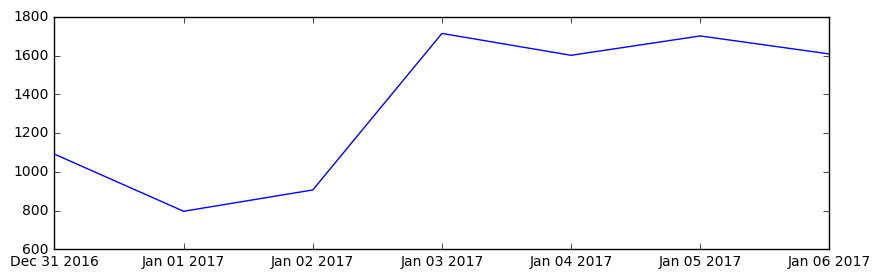

In [88]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

Challenge 5

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [92]:
# I will start forming this dictionary from dict3
dict3

OrderedDict([(('A002', 'R051', '02-00-00', '59 ST'),
              [[datetime.datetime(2016, 12, 31, 0, 0), '3:00:00', '5991546'],
               [datetime.datetime(2016, 12, 31, 0, 0), '7:00:00', '5991565'],
               [datetime.datetime(2016, 12, 31, 0, 0), '11:00:00', '5991644'],
               [datetime.datetime(2016, 12, 31, 0, 0), '15:00:00', '5991971'],
               [datetime.datetime(2016, 12, 31, 0, 0), '19:00:00', '5992418'],
               [datetime.datetime(2016, 12, 31, 0, 0), '23:00:00', '5992638'],
               [datetime.datetime(2017, 1, 1, 0, 0), '3:00:00', '5992718'],
               [datetime.datetime(2017, 1, 1, 0, 0), '7:00:00', '5992730'],
               [datetime.datetime(2017, 1, 1, 0, 0), '11:00:00', '5992776'],
               [datetime.datetime(2017, 1, 1, 0, 0), '15:00:00', '5992980'],
               [datetime.datetime(2017, 1, 1, 0, 0), '19:00:00', '5993301'],
               [datetime.datetime(2017, 1, 1, 0, 0), '23:00:00', '5993515'],
               

In [160]:
# Create a dictionary with station name & date as key and entires as value
dict_list = list(dict3.keys())

dict_7 = collections.OrderedDict()

for key in dict_list:
    position_1 = str(key).find(',')
    position_2 = str(key).find(',', position_1 + 1)
    position_3 = str(key).find(',', position_2 + 1)
    station = str(key)[position_3 + 2 : -2]
    station_and_date = station + ', ' + str(dict3[key][1][0])
    if station_and_date not in dict_7:
        dict_7[station_and_date] = [str((dict3[key][1][2]))]
    else:
        dict_7[station_and_date].append(dict3[key][1][2])

In [162]:
# Display the dictionary
dict_7

OrderedDict([("'59 ST, 2016-12-31 00:00:00",
              ['5991565',
               '5475418',
               '841886',
               '122402',
               '5209488',
               '4846960',
               '6123350',
               '9884174',
               '7781216',
               '1344',
               '',
               '6846969']),
             ("'5 AV/59 ST, 2016-12-31 00:00:00",
              ['2627176',
               '3867817',
               '7628277',
               '2229066',
               '6949144',
               '8180192',
               '2158051',
               '13988211',
               '2850',
               '1',
               '3057185',
               '118210980',
               '4004282',
               '6055465']),
             ("'57 ST-7 AV, 2016-12-31 00:00:00",
              ['1949960',
               '13451400',
               '9785562',
               '2458632',
               '3113380',
               '211324',
               '16202250',
          

Challenge 6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [247]:
# Similarly, I will start with dict3
dict3

OrderedDict([(('A002', 'R051', '02-00-00', '59 ST'),
              [[datetime.datetime(2016, 12, 31, 0, 0),
                '3:00:00',
                '5991546',
                [datetime.datetime(2016, 12, 31, 0, 0), '11:00:00', '5991644'],
                [datetime.datetime(2016, 12, 31, 0, 0), '11:00:00', '5991644'],
                [datetime.datetime(2016, 12, 31, 0, 0), '7:00:00', '5991565'],
                [datetime.datetime(2016, 12, 31, 0, 0),
                 '11:00:00',
                 '5991644']],
               [datetime.datetime(2016, 12, 31, 0, 0), '7:00:00', '5991565'],
               [datetime.datetime(2016, 12, 31, 0, 0), '11:00:00', '5991644'],
               [datetime.datetime(2016, 12, 31, 0, 0), '15:00:00', '5991971'],
               [datetime.datetime(2016, 12, 31, 0, 0), '19:00:00', '5992418'],
               [datetime.datetime(2016, 12, 31, 0, 0), '23:00:00', '5992638'],
               [datetime.datetime(2017, 1, 1, 0, 0), '3:00:00', '5992718'],
              

In [267]:
# Create a dictionary using station name as key and (date, count) as value

dict_list = list(dict3.keys())

dict8 = collections.OrderedDict()

for key in dict_list:
    if key not in dict8:
        dict8[key] = [str(dict3[key][0][0])]
        dict8[key].append(dict3[key][0][2])
    else:
        dict8[key].append(str(dict3[key][0][0]))
        dict8[key].append(dict3[key][0][2])

In [268]:
dict8

OrderedDict([(('A002', 'R051', '02-00-00', '59 ST'),
              ['2016-12-31 00:00:00', '5991546']),
             (('A002', 'R051', '02-00-01', '59 ST'),
              ['2016-12-31 00:00:00', '5475418']),
             (('A002', 'R051', '2/3/00', '59 ST'),
              ['2016-12-31 00:00:00', '841884']),
             (('A002', 'R051', '2/3/01', '59 ST'),
              ['2016-12-31 00:00:00', '122389']),
             (('A002', 'R051', '2/3/02', '59 ST'),
              ['2016-12-31 00:00:00', '5209470']),
             (('A002', 'R051', '2/3/03', '59 ST'),
              ['2016-12-31 00:00:00', '4846952']),
             (('A002', 'R051', '2/3/04', '59 ST'),
              ['2016-12-31 00:00:00', '6123337']),
             (('A002', 'R051', '2/3/05', '59 ST'),
              ['2016-12-31 00:00:00', '9884139']),
             (('A002', 'R051', '2/3/06', '59 ST'),
              ['2016-12-31 00:00:00', '7781200']),
             (('A002', 'R051', '2/5/00', '59 ST'),
              ['2016-12-31 00

Challenge 7

Plot the time series for a station.

In [269]:
station_name = ('A002', 'R051', '02-00-00', '59 ST')

In [282]:
list(dict8.keys())[0][3]

'59 ST'

In [315]:
dates = []

for key in list(dict8.keys()):
    if key[3] == '59 ST':
        dates.append(dict8[key][0])

In [323]:
counts = []

for key in list(dict8.keys()):
    if key[3] == '59 ST':
        counts.append(dict8[key][1])

In [317]:
dates = list(map(dateutil.parser.parse, dates))

In [318]:
dates

[datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0),
 datetime.datetime(2016, 12, 31, 0, 0)]

In [325]:
counts

counts[-2] = '0'

In [326]:
counts = list(map(int, counts))

In [327]:
counts

[5991546,
 5475418,
 841884,
 122389,
 5209470,
 4846952,
 6123337,
 9884139,
 7781200,
 1344,
 0,
 6846954]

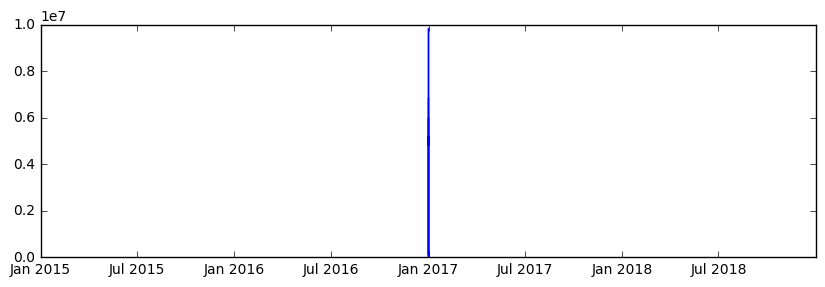

In [328]:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

Challenge 8

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [329]:
# I will start forming this from dict6 and assume we want to look at '57 ST-7 AV'

dict6

{"('A010', 'R080', '00-00-05', '57 ST-7 AV')2017-01-01 00:00:00": [655],
 "('A021', 'R032', '01-00-02', 'TIMES SQ-42 ST')2017-01-06 00:00:00": [1675],
 "('A021', 'R032', '01-00-07', 'TIMES SQ-42 ST')2017-01-06 00:00:00": [2198],
 "('A038', 'R085', '00-00-04', '8 ST-NYU')2017-01-06 00:00:00": [1335],
 "('A046', 'R463', '00-06-02', 'CANAL ST')2017-01-06 00:00:00": [1894],
 "('A025', 'R023', '1/3/00', '34 ST-HERALD SQ')2017-01-06 00:00:00": [3732],
 "('A021', 'R032', '01-00-00', 'TIMES SQ-42 ST')2017-01-02 00:00:00": [1192],
 "('A029', 'R082', '00-00-00', '28 ST')2017-01-01 00:00:00": [197],
 "('A046', 'R463', '00-06-06', 'CANAL ST')2017-01-04 00:00:00": [783],
 "('A013', 'R081', '1/5/01', '49 ST')2017-01-02 00:00:00": [0],
 "('A029', 'R082', '00-03-00', '28 ST')2017-01-05 00:00:00": [1393],
 "('A054', 'R227', '1/3/01', 'RECTOR ST')2017-01-05 00:00:00": [1360],
 "('A031', 'R083', '00-00-00', '23 ST')2017-01-03 00:00:00": [2317],
 "('A043', 'R462', '00-03-02', 'CANAL ST')2017-01-01 00:00:0

In [346]:
for key in dict_list:
    position_1 = str(key).find(',')
    position_2 = str(key).find(',', position_1 + 1)
    position_3 = str(key).find(',', position_2 + 1)
    position_4 = str(key).find(')', position_3 + 1)
    station = key[position_3 + 1:position_4]
    if station == '57 ST-7 AV':
        print ('yes')

Challenge 9

Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [348]:
# I will start forming this from dict6 

dict6

{"('A010', 'R080', '00-00-05', '57 ST-7 AV')2017-01-01 00:00:00": [655],
 "('A021', 'R032', '01-00-02', 'TIMES SQ-42 ST')2017-01-06 00:00:00": [1675],
 "('A021', 'R032', '01-00-07', 'TIMES SQ-42 ST')2017-01-06 00:00:00": [2198],
 "('A038', 'R085', '00-00-04', '8 ST-NYU')2017-01-06 00:00:00": [1335],
 "('A046', 'R463', '00-06-02', 'CANAL ST')2017-01-06 00:00:00": [1894],
 "('A025', 'R023', '1/3/00', '34 ST-HERALD SQ')2017-01-06 00:00:00": [3732],
 "('A021', 'R032', '01-00-00', 'TIMES SQ-42 ST')2017-01-02 00:00:00": [1192],
 "('A029', 'R082', '00-00-00', '28 ST')2017-01-01 00:00:00": [197],
 "('A046', 'R463', '00-06-06', 'CANAL ST')2017-01-04 00:00:00": [783],
 "('A013', 'R081', '1/5/01', '49 ST')2017-01-02 00:00:00": [0],
 "('A029', 'R082', '00-03-00', '28 ST')2017-01-05 00:00:00": [1393],
 "('A054', 'R227', '1/3/01', 'RECTOR ST')2017-01-05 00:00:00": [1360],
 "('A031', 'R083', '00-00-00', '23 ST')2017-01-03 00:00:00": [2317],
 "('A043', 'R462', '00-03-02', 'CANAL ST')2017-01-01 00:00:0

In [359]:
# Create a dictionary with number of entries for each station
dict7 = collections.OrderedDict()

for key in list(dict6.keys()):
    position_1 = str(key).find(',')
    position_2 = str(key).find(',', position_1 + 1)
    position_3 = str(key).find(',', position_2 + 1)
    position_4 = str(key).find('2', position_3 + 1)
    station_name = str(key)[position_3+1:position_4-1]
    if station_name not in dict7:
        dict7[station_name] = dict6[key]
    else:
        dict7[station_name] += dict6[key]

In [360]:
dict7

OrderedDict([(" '57 ST-7 AV'",
              [655,
               2347,
               2837,
               1656,
               593,
               1996,
               1040,
               548,
               1794,
               2183,
               1107,
               812,
               2397,
               1724,
               1094,
               1775,
               960,
               936,
               4140,
               1482,
               1400,
               25,
               1178,
               1044,
               3736,
               1099,
               1652,
               1193,
               1465,
               2374,
               1855,
               2742,
               1921,
               503,
               2959,
               1145,
               1901,
               2340,
               3057,
               2809,
               513,
               1446,
               1308,
               2045,
               3378,
               2261,
             

In [367]:
# Create a dictionary combining the entries into total for each station
dict8 = collections.OrderedDict()

for key in list(dict7.keys()):
    total = 0
    for n in range(len(dict7[key])):
        total += dict7[key][n]
    dict8[key] = total

In [368]:
dict8

OrderedDict([(" '57 ST-7 AV'", 328897),
             (" 'TIMES SQ-", 129207),
             (" '8 ST-NYU'", 163535),
             (" 'CANAL ST'", -193575740),
             (" '34 ST-HERALD SQ'", 508546),
             (' ', 362217),
             (" '49 ST'", 257392),
             (" 'RECTOR ST'", 41932),
             (" '14 ST-UNION SQ'", 623803),
             (" 'CORTLANDT ST'", 182284),
             (" 'CITY HALL'", 62163),
             (" '59 ST'", 161175),
             (" '5 AV/59 ST'", 177219),
             (" 'PRINCE ST'", 174754)])

Challenge 10

Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

In [379]:
stations = list(dict8.keys())
totals = (dict8.values())

In [381]:
stations

[" '57 ST-7 AV'",
 " 'TIMES SQ-",
 " '8 ST-NYU'",
 " 'CANAL ST'",
 " '34 ST-HERALD SQ'",
 ' ',
 " '49 ST'",
 " 'RECTOR ST'",
 " '14 ST-UNION SQ'",
 " 'CORTLANDT ST'",
 " 'CITY HALL'",
 " '59 ST'",
 " '5 AV/59 ST'",
 " 'PRINCE ST'"]

In [382]:
totals 

[328897,
 129207,
 163535,
 -193575740,
 508546,
 362217,
 257392,
 41932,
 623803,
 182284,
 62163,
 161175,
 177219,
 174754]

ValueError: could not convert string to float: '57 ST-7 AV'

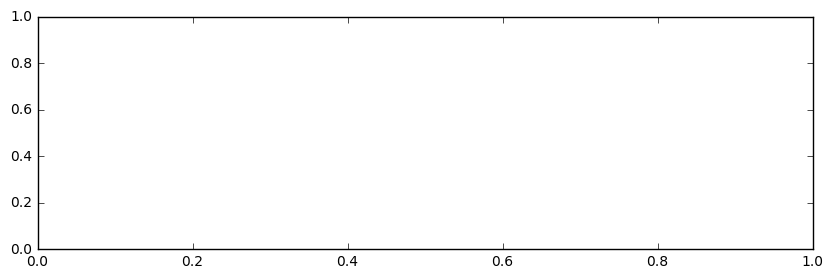

In [389]:
plt.figure(figsize=(10,3))
plt.bar(stations, totals)